## Intermediate Python

What you have been studying up to this point has been the basics of the Python library and its native data structures. However, for data analysis, new specialized packages (AKA Python modules) must be called in. The set of these specific packages, because they are so often used together and are built on top of each other, are often called the "SciPy stack" by the Python community, after one of the core packages, SciPy.

The specific packages in the SciPy stack include: 
* ***[NumPy:](https://docs.scipy.org/doc/numpy/index.html)*** Allows for use of a new, multi-dimensional array object specifically focused on numerical analysis. The NumPy package also has functions for linear algebra calculations, Fourier transforms, and random number generation.
* ***[SciPy:](https://www.scipy.org/scipylib/index.html)*** Contains many high-level, domain-specific mathematical algorithms designed for scientific computing (e.g. integration, statistical hypothesis testing, and image processing). The addition of these functions brings Python up to a comparable data processing level with MATLAB or Octave while still allowing the flexibility and relative ease of writing code in Python. The SciPy package is also built on top of NumPy--most SciPy functions take NumPy arrays as parameters--and requires NumPy for installation. 
* ***[Matplotlib:](http://matplotlib.org/)*** A 2D and 3D data visualization library for producing all kinds of graphics, including histograms, boxplots, scatterplots, and surface plots. The graphics produced are publication quality and the full package is overall on par with R's ggplot2 in terms of graphics capabilities.
    * Incidentally, there is a setting to produce matplotlib graphics in the same style as ggplot2
* ***[Pandas:](http://pandas.pydata.org/)*** This is the package we will likely be using the most in our research. Pandas is the essential data analysis library for Python. It includes functions for reading data in from multiple sources including SQL, Excel, SAS, and JSON. Pandas also introduces the Series and Data Frame objects which are geared specifically toward data analysis and modeling. Pandas is built on top of NumPy, SciPy, and matplotlib, and often imports functions from them for its data manipulation methods.
* ***[SciKit-Learn:](http://scikit-learn.org/stable/)*** Once we start getting into machine learning, this will likely be the second-most-frequently used Python package in our big data research. SciKit-learn offers the full suite of machine-learning algorithms including neural networks, support vector machines, and random forests. SciKit-Learn also contains functions for processing data and functions for evaluating mathematical model performance, and it is all built on top of NumPy, Pandas, and SciPy.

There are many other packages available that work in conjunction with these five, but for the sake of simplicity we will only  focus on these for the time being. In fact, here is a good illustration of how the full SciPy stack is set up and how the packages build on one another:

![scipy](https://image.slidesharecdn.com/anacondapydatasolutions2015-151017213330-lva1-app6891/95/anaconda-and-pydata-solutions-25-638.jpg)

To get all of these packages in one convenient place, I recommend using the *free* Anaconda distribution for Python version 2. It is specifically built for data science and includes over 700 packages for this purpose. (Did I mention it's free?) The free version may be found here: https://www.continuum.io/downloads

To start, we will try out some NumPy functions and eventually move on to manipulating Pandas data frames. Ideally, we will cover the basics of implementing machine learning algorithms during the next session.

---

### NumPy

First, we need to import the package (which is already included in Anaconda distribution)
Typically, for the sake of simplicity, most programmers use the np alias for numpy like so:

In [ ]:
import numpy as np

In [ ]:
#Now we can set up the key object in the numpy package: the numpy array
#For starters, we will use a basic, one-dimensional array
a = np.arange(15)

In [ ]:
#Here's what the array actually looks like. It doesn't look much different from a regular list, does it?
print a

In [ ]:
#A two-dimensional array actually can be created like this
b = np.array([(0,1,2,3,4,5,6,7), (8,9,10,11,12,13,14,15)])
b

In [ ]:
#We can reshape existing arrays into different dimensions
a_new = a.reshape(3,5)
a_new

In [ ]:
#With these arrays, we can call and run all kinds of methods (functions which are available for certain object types)
#One-dimensional array examples
print "The sum of the array is: ", a.sum(), "\n"

print "The average of the array is: ", a.mean(), "\n"

print "The standard deviation of the array is: ", a.std(), "\n"

print "Squared array:\n", a**2,"\nSquare-root array:\n", np.sqrt(a)

In [ ]:
#We can also call certain attributes of the array itself

a_dim = a.ndim
b_dim = b.ndim
a_new_dim = a_new.ndim

print "The array 'a' is a "+str(a_dim)+"-dimensional array"
print "The array 'b' is a "+str(b_dim)+"-dimensional array"
print "The array 'a_new' is a "+str(a_new_dim)+"-dimensional array"

In [ ]:
#We can even subtract two arrays from each other element-wise, which we can't do with lists normally
c = a*0.75
print a
print c
print "\nDifference between arrays 'a' and 'c': ", a-b

In [ ]:
#Why use NumPy arrays over lists? Aside from the handiness of having built-in numerical functions, 
#NumPy is also much faster since it is built on C. An illustration...
from timeit import default_timer as timer
n = 10000

for i in range(3):
    start = timer()
    test1 = np.arange(n)
    test1.sum()
    end = timer()
    print "NumPy array time for n = "+str(n)+": "+str(end-start)
    
    start = timer()
    test2 = range(n)
    sum(test2)
    end = timer()
    print "Python list time for n = "+str(n)+": "+str(end-start)+"\n"
    
    n*=10

-----

### Pandas

Using Pandas, in combination with the pyobdc package, we can connect to the Leonidas database and access our EHR and Claims data. Once we have our data in a DataFrame object, we can manipulate it in all kinds of ways.

To start, we need to check on which drivers we have available for connecting. The drivers() function from the pyODBC package outputs the available database drivers on the given computer in the form of a list. A non-Pythonic way to access the same list is to go to the following path: `Control Panel\All Control Panel Items\Administrative Tools\ODBC Data Sources (64-bit)` and go to the `Drivers` tab.

In [2]:
import pyodbc
pyodbc.drivers()

['SQL Server',
 'SQL Server Native Client 11.0',
 'ODBC Driver 11 for SQL Server']

In my experience, either ODBC Driver 11 or 13 for SQL Server are the best options for connecting here since they support a broader range of SQL Server versions; ODBC Driver 11 supports SQL Servers 2005-2014, and ODBC Driver 13 supports SQL Server 2005-2016.

In [3]:
#To actually connect to the database, set up the connection string like so...
#DRIVER = the applicable driver for accessing the database
#SERVER = your data server
#DATABASE = the name of the specific database
#UID = your username to access database
#PWD = your password

DRIVER = 'ODBC Driver 11 for SQL Server'
SERVER = 'leonidas.database.windows.net'
DATABASE = 'prometricsinstitute'
UID = 'talleys'
PWD = 'Prometrics2017!'
conn = pyodbc.connect('DRIVER={'+DRIVER+'};SERVER='+SERVER+';DATABASE='+DATABASE+';UID='+UID+';PWD='+PWD)

Now we're ready to grab some data! Let's start with the PatientDemographics table as a basic example.

In [4]:
import pandas as pd

#Using pandas, we can read the results from SQL queries to our database directly into a DataFrame object for our use
data = pd.read_sql('''SELECT TOP (3500) * FROM [leonidas].[PatientDemographics_Current]''', conn)

#Get column names from PatientDemographics data frame
data.columns

Index([u'feed_tag', u'RecType', u'RecTypeVersion', u'GenClientID',
       u'Gen2ClientID', u'GenPatientID', u'Gen2PatientID', u'DOByear',
       u'DeceasedFlag', u'Gender', u'Race', u'Ethnicity1', u'Zip3', u'State',
       u'SmokingStatusFlag', u'LastUpdateDTTM', u'GenProviderID',
       u'Gen2ProviderID', u'PrimaryKey'],
      dtype='object')

In [ ]:
#Get top 5 records from data frame to display
data.head(5)

In [ ]:
#Get the last 5 rows from data frame
data.tail(5)

In [ ]:
#We can also use pandas to get pivot table-esque summaries of our data
print data.Gender.value_counts(), "\n"

print data.GenClientID.value_counts()

In [ ]:
#We can even use it with multiple columns via the pivot_table function. For reference:
#values = the values used for the counts
#index = the row categories used for the pivot table; can pass multiple columns in the form of a list
#columns = the column categories used for the pivot table; can pass multiple columns in the form of a list
#aggfunc = The aggregation function used on the values. 
#Depending on the data type, the functions can be 'count', np.sum, np.mean, etc.
table1 = pd.pivot_table(data, values='Gen2PatientID', index=['Gender', 'State'], columns=['DeceasedFlag'],aggfunc='count')
print table1, "\n"
table2 = pd.pivot_table(data, values='DOByear', index=['Gender', 'State'], columns=['DeceasedFlag'],aggfunc=np.sum)
print table2, "\n"

#We can also pass a list of functions as an argument for the aggfunc parameter
table3 = pd.pivot_table(data, values='DOByear', index=['Gender', 'State'], columns=['DeceasedFlag'],aggfunc=[np.sum, np.mean])
print table3

---

### Matplotlib

While the plotting functions for Matplotlib can be accessed on their own, pandas has the functions "wrapped" into methods for the DataFrame object, meaning that we can plot a given column from a data frame without necessarily calling matplotlib every time.

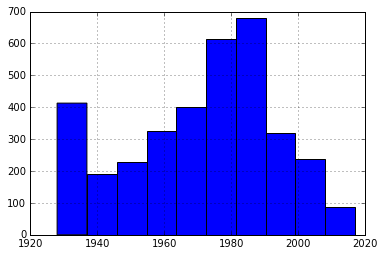

In [5]:
#This line of code is actually a "magic function" for the Jupyter notebook itself. 
#Specifically, this command tells Jupyter to print plots inside the notebook
%matplotlib inline
#Histogram for DOB year column of our patient data
data.DOByear.hist()

In [6]:
#We can also change the style of graph and add other elements to it by bringing in the matplotlib module
import matplotlib.pyplot as plt
import matplotlib

#Let's see what styles we have available...
print matplotlib.style.available

[u'seaborn-darkgrid', u'seaborn-notebook', u'classic', u'seaborn-ticks', u'grayscale', u'bmh', u'seaborn-talk', u'dark_background', u'ggplot', u'fivethirtyeight', u'seaborn-colorblind', u'seaborn-deep', u'seaborn-whitegrid', u'seaborn-bright', u'seaborn-poster', u'seaborn-muted', u'seaborn-paper', u'seaborn-white', u'seaborn-pastel', u'seaborn-dark', u'seaborn-dark-palette']


In [ ]:
#Use the ggplot style to make graphs look like those from R's ggplot2 package
matplotlib.style.use('ggplot')

#Add a few chart elements (these aren't part of the plot function due to the way matplotlib was originally set up;
#matplotlib allows customization of labels and options between the time graph is set up vs. when it is shown)
#However, these can be used inside of the plot function in pandas, as we'll see shortly
plt.title('Test Title')
plt.xlabel('Age Distribution')
plt.ylabel('Patient Count')

#Re-run the graph and view the results
data.DOByear.hist()

In [ ]:
matplotlib.rcParams['figure.figsize'] = (15.0, 14.0)
matplotlib.style.use('fivethirtyeight')
data.Gender.value_counts().plot(kind='pie', autopct='%1.2f%%', shadow=True, figsize=(13.0,12.0), title='Test Title 2: Electric Boogaloo')

In [ ]:
matplotlib.style.use('seaborn-notebook')
data['State'].value_counts().plot(kind='bar', x='State', y='Count', title='Patients by State')

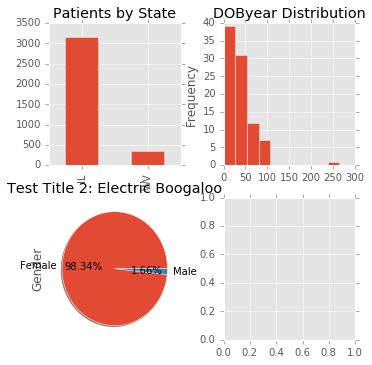

In [19]:
#You can also display multiple plots in the same area via the subplot method:
fig, axes = plt.subplots(2, 2, figsize=(5, 5))
matplotlib.style.use('ggplot')
plt.tight_layout() #Basically fits the plots to the size of the subplot area

#Plot all 3 of the graphs above on the same subplot. Need to explicitly declare sharex=False and sharey=False when doing this
data['State'].value_counts().plot(kind='bar', x='State', y='Count', sharex=False, sharey=False, ax=axes[0][0], title='Patients by State')
data['DOByear'].value_counts().plot(kind='hist',x='DOByear', ax=axes[0][1], sharex=False, sharey=False, title='DOByear Distribution')
data.Gender.value_counts().plot(kind='pie', autopct='%1.2f%%', ax=axes[1][0], shadow=True, sharex=False, sharey=False, title='Test Title 2: Electric Boogaloo')

---